# Notes

future enhancements<BR>


In [ ]:
# Install Libraries
#!pip install pystan
#!pip install fbprophet
#!pip install yfinance

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests
from fbprophet import Prophet
import yfinance as yf
import seaborn as sns

import itertools
import warnings

import sys
import statsmodels.api as sm
import statsmodels.tsa.api as smt

Importing plotly failed. Interactive plots will not work.


In [2]:
entry = input("Input stock symbol: ")

Input stock symbol: bmo


In [3]:
stock = yf.Ticker(entry)
data = stock.history(period="5y", auto_adjust=True)

In [4]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-02-03,44.607854,45.127036,43.787211,44.993053,1117900,0.000,0
2016-02-04,45.034926,45.964431,45.034926,45.395004,875500,0.000,0
2016-02-05,45.219153,45.277771,44.574361,44.741840,546200,0.000,0
2016-02-08,44.088674,44.473873,43.711847,44.222656,882200,0.000,0
2016-02-09,43.661606,44.130547,42.623242,43.134048,1156800,0.000,0
...,...,...,...,...,...,...,...
2021-01-28,75.338716,76.288362,74.873783,75.862999,699800,0.000,0
2021-01-29,75.699997,76.160004,74.050003,74.309998,831200,0.827,0
2021-02-01,74.949997,74.970001,74.250000,74.480003,387200,0.000,0


In [5]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000,1260.0
mean,64.125526,64.542633,63.688944,64.126397,5.527419e+05,0.009849,0.0
std,8.433186,8.330958,8.523931,8.427231,3.488708e+05,0.084521,0.0
min,38.152661,39.414613,36.349876,36.729408,8.300000e+04,0.000000,0.0
25%,57.080795,57.383307,56.722382,56.955692,3.499000e+05,0.000000,0.0
50%,66.857430,67.199960,66.482152,66.811386,4.661500e+05,0.000000,0.0
75%,70.633260,70.924056,70.213599,70.616917,6.380250e+05,0.000000,0.0
max,78.642700,79.532996,78.019496,78.217331,4.278400e+06,0.827000,0.0


In [6]:
#data=data.reset_index()

In [7]:
#data['Date']=data['Date'].dt.strftime('%Y-%m-%d')

In [8]:
#data.to_json(r'data.json',orient='records')

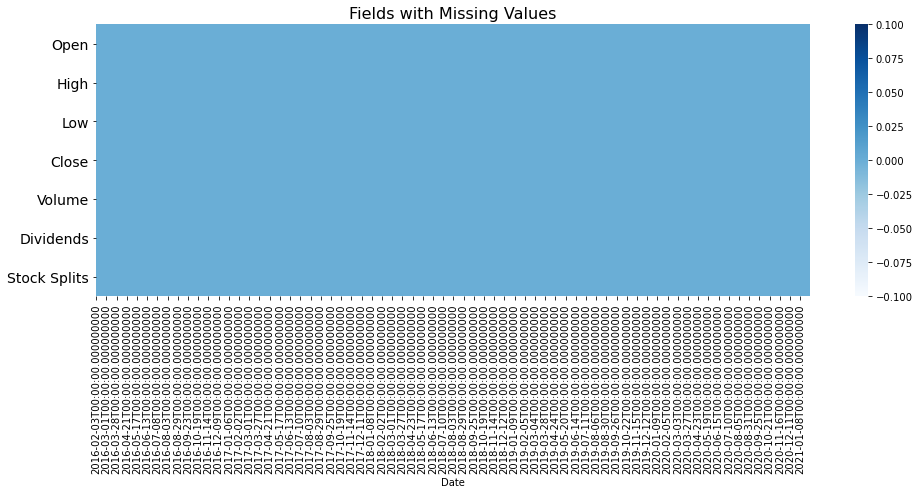

In [9]:
# missing data

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
sns.heatmap(data.T.isna(), cmap='Blues')
ax.set_title('Fields with Missing Values', fontsize=16)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

# Prophet method

In [10]:
datap = data.reset_index()

In [11]:
# Select only the important features i.e. the date and price
datap = datap[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
datap = datap.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
datap.head(5)

,ds,y
0,2016-02-03,44.993053
1,2016-02-04,45.395004
2,2016-02-05,44.741840
3,2016-02-08,44.222656
4,2016-02-09,43.134048


In [12]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(datap) # fit the model using all data

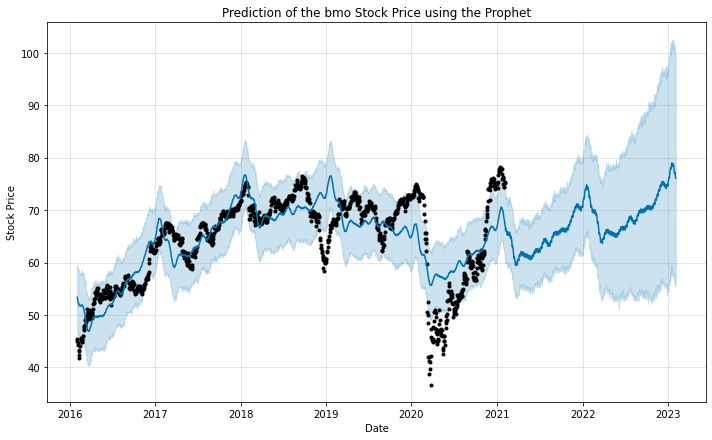

In [60]:
future = m.make_future_dataframe(periods=730) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the " + entry + " Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.savefig(entry + '.png',bbox_inches='tight')
plt.show()

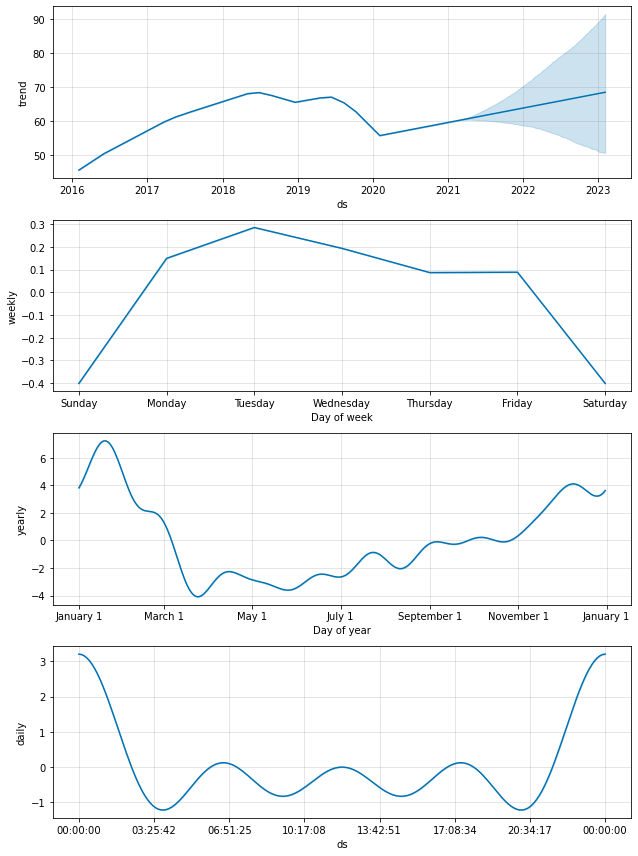

In [14]:
m.plot_components(prediction)
plt.savefig(entry + '-seasonality.png')
plt.show()

In [15]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-02-03,45.655979,46.770492,59.913728,45.655979,45.655979,7.702731,7.702731,7.702731,3.208424,...,0.193116,0.193116,0.193116,4.301191,4.301191,4.301191,0.0,0.0,0.0,53.358710
1,2016-02-04,45.695879,46.720466,59.481749,45.695879,45.695879,7.313252,7.313252,7.313252,3.208424,...,0.086610,0.086610,0.086610,4.018218,4.018218,4.018218,0.0,0.0,0.0,53.009132
2,2016-02-05,45.735780,46.338695,58.899094,45.735780,45.735780,7.044973,7.044973,7.044973,3.208424,...,0.088330,0.088330,0.088330,3.748219,3.748219,3.748219,0.0,0.0,0.0,52.780752
3,2016-02-08,45.855481,45.909761,58.077683,45.855481,45.855481,6.405074,6.405074,6.405074,3.208424,...,0.149122,0.149122,0.149122,3.047528,3.047528,3.047528,0.0,0.0,0.0,52.260555
4,2016-02-09,45.895381,45.535444,58.526426,45.895381,45.895381,6.351289,6.351289,6.351289,3.208424,...,0.284928,0.284928,0.284928,2.857937,2.857937,2.857937,0.0,0.0,0.0,52.246670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,2023-01-30,68.503641,58.103910,100.087623,50.758367,91.216426,8.765051,8.765051,8.765051,3.208424,...,0.149122,0.149122,0.149122,5.407505,5.407505,5.407505,0.0,0.0,0.0,77.268692
1986,2023-01-31,68.515281,58.405641,101.279071,50.744777,91.291552,8.606571,8.606571,8.606571,3.208424,...,0.284928,0.284928,0.284928,5.113219,5.113219,5.113219,0.0,0.0,0.0,77.121852
1987,2023-02-01,68.526922,57.663612,99.697025,50.730272,91.366679,8.217236,8.217236,8.217236,3.208424,...,0.193116,0.193116,0.193116,4.815695,4.815695,4.815695,0.0,0.0,0.0,76.744158
1988,2023-02-02,68.538562,57.770419,99.588972,50.715766,91.441805,7.814642,7.814642,7.814642,3.208424,...,0.086610,0.086610,0.086610,4.519608,4.519608,4.519608,0.0,0.0,0.0,76.353205


In [16]:
stock.actions

,Dividends,Stock Splits
Date,,
2016-04-28,0.667,0.0
2016-07-27,0.652,0.0
2016-10-28,0.642,0.0
2017-01-30,0.669,0.0
2017-04-27,0.646,0.0
2017-07-28,0.717,0.0
2017-10-31,0.701,0.0
2018-01-31,0.754,0.0
2018-04-30,0.725,0.0


In [17]:
df_reco = stock.recommendations.sort_index(ascending=False).head(10)
df_reco = df_reco.reset_index()
df_reco

,Date,Firm,To Grade,From Grade,Action
0,2020-12-02 15:56:21,Credit Suisse,Neutral,,main
1,2020-05-13 12:53:49,B of A Securities,Underperform,,main
2,2020-05-11 15:23:11,Barclays,Equal-Weight,,main
3,2020-02-26 17:32:48,B of A Securities,Underperform,,main
4,2019-01-28 13:43:45,Bank of America,Underperform,Neutral,down
5,2018-08-29 12:47:50,Canaccord Genuity,Buy,Hold,up
6,2018-07-18 11:26:15,RBC Capital,Outperform,Sector Perform,up
7,2018-02-15 13:56:03,Macquarie,Outperform,Neutral,up
8,2017-05-23 11:35:45,Barclays,Equal-Weight,Underweight,up
9,2017-05-18 16:20:52,Citigroup,Buy,Neutral,up


In [18]:
df_reco['Date']=df_reco['Date'].dt.strftime('%Y-%m-%d')

In [19]:
df_reco.to_json(r'reco.json',orient='records')

In [20]:
df_actions = stock.actions.sort_index(ascending=False).head(10)
df_actions = df_actions.reset_index()

In [21]:
df_actions['Date']=df_actions['Date'].dt.strftime('%Y-%m-%d')

In [58]:
df_actions.to_json(r'actions.json',orient='records')


# SARIMA method


In [23]:
datas = data.reset_index()

In [24]:
# Select only the important features i.e. the date and price
datas = datas[["Date","Close"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
datas.head(5)

,Date,Close
0,2016-02-03,44.993053
1,2016-02-04,45.395004
2,2016-02-05,44.741840
3,2016-02-08,44.222656
4,2016-02-09,43.134048


In [25]:
datas=datas.set_index('Date')

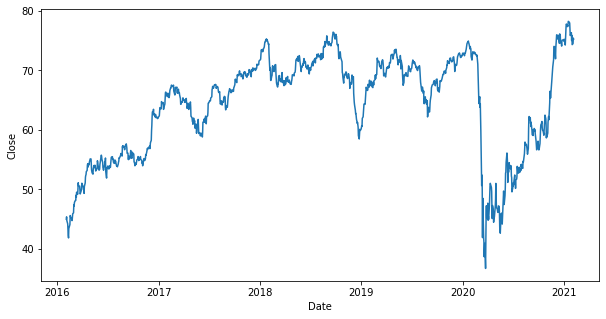

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(datas)
plt.xlabel('Date')
plt.ylabel('Close')

plt.savefig("dataplot.png",bbox_inces='tight')


Text(0, 0.5, 'Close')

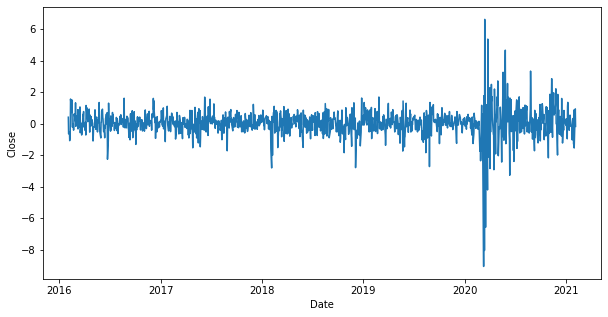

In [27]:
#STEP 1 Difference data to make data stationary on mean (remove trend)
#Plot data as time series
plt.figure(figsize=(10, 5))
plt.plot(datas.diff(periods=1))
plt.xlabel('Date')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

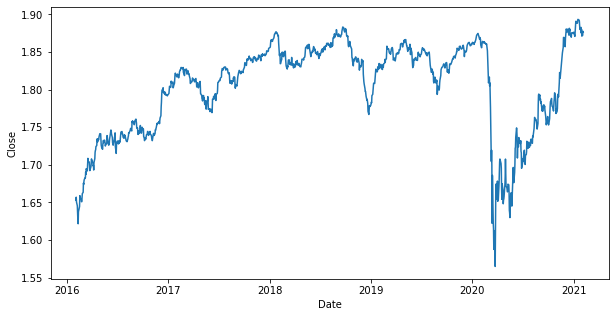

In [28]:
#STEP 2 Difference log transform data to make data stationary on both mean and variance
#log transform data (make data stationary on variance)
plt.figure(figsize=(10, 5))
plt.plot(np.log10(datas))
plt.xlabel('Date')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

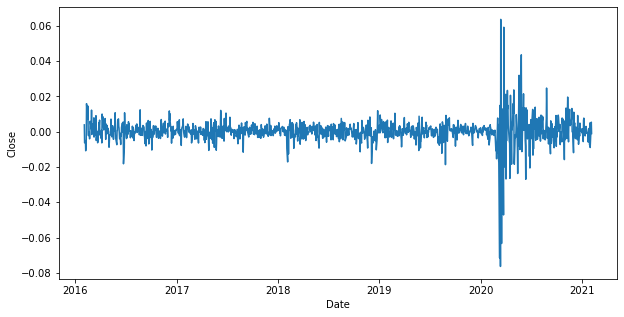

In [29]:
#differenced log transform data 
#To confirm if the series actually stationary on both mean and variance 
plt.figure(figsize=(10, 5))
plt.plot(np.log10(datas).diff(periods=1))
plt.xlabel('Date')
plt.ylabel('Close')

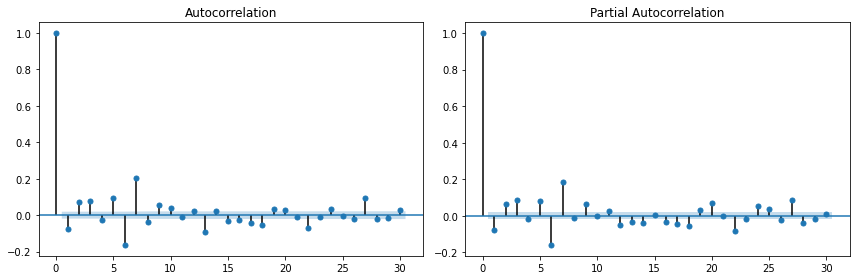

In [53]:
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Step 3
#PLOT ACF(Autocoreelation factor) AND PACF to identify potential AR and MA Model

datas_log = np.log10(datas)
datas_log.dropna(inplace=True)

datas_log_diff = datas_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
datas_log_diff.dropna(inplace=True)

fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(datas_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(datas_log_diff, lags=30, ax=axes[1], alpha=0.5)

plt.savefig("autocorr.png",bbox_inces='tight')

plt.tight_layout()

#Able to find the seasonal component availabe in the residuals at the lag 7

In [31]:
#Step 4:
#Find ARIMA(p,d,q): Identification of best fit ARIMA model
#Test difference combination of p,d,q
#Find the minimum AIC(Akaike Information Criterion)
# d should be 1, from previous step
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

In [ ]:
# this takes long to run e.g. 1 hour

warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(datas_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True,
                                                   initialization='approximate_diffuse')
            results = temp_model.fit()

            # print("SARIMAX{}x{} - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{} model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

In [32]:
#Step5 prediction

best_model = sm.tsa.statespace.SARIMAX(datas_log, order=(0, 1, 0), seasonal_order=(0, 0, 0, 7), enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()
# Get forecast 730 steps (2 years) ahead in future
n_steps = 730
pred_uc_99 = best_results.get_forecast(steps=730, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=730, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

idx = pd.date_range(datas.index[-1], periods=n_steps, freq='D')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`

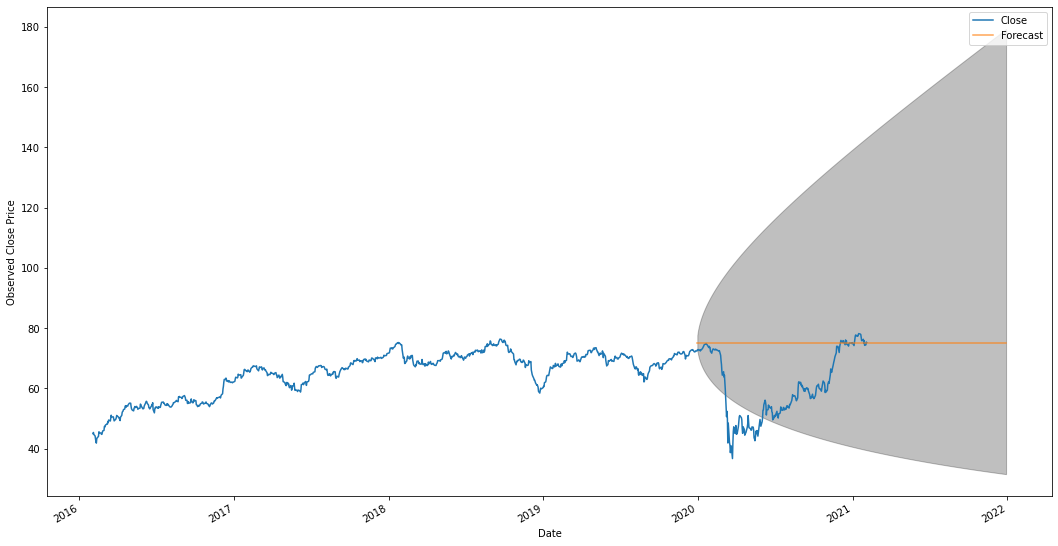

In [54]:
# plot the forecast along with the confidence band
axis = datas.plot(label='Observed', figsize=(18, 10))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Date')
axis.set_ylabel('Observed Close Price')
plt.legend(loc='best')

plt.savefig("forecast.png",bbox_inces='tight')

plt.show()

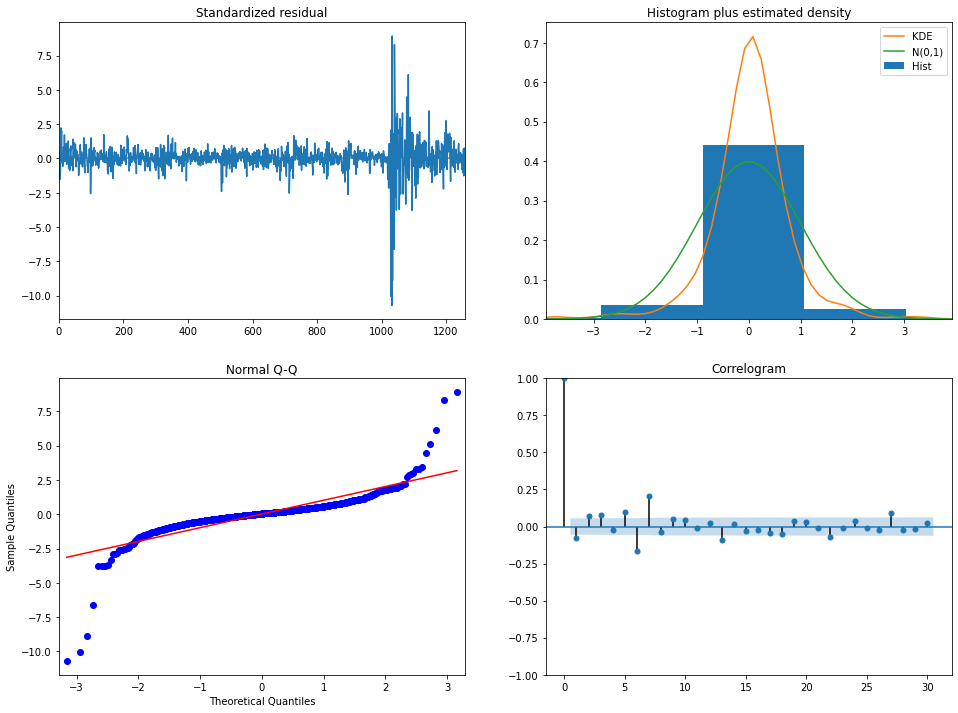

In [55]:
# validate Time series analysis result
best_results.plot_diagnostics(lags=30, figsize=(16,12))

plt.savefig("diagnostics.png",bbox_inces='tight')

plt.show()

# SARIMA attempt #2 

In [35]:
# remove 2020 March onward to see impact to prediction

In [36]:
datas2 = datas.reset_index()

In [37]:
datas2.tail(5)

,Date,Close
1255,2021-01-28,75.862999
1256,2021-01-29,74.309998
1257,2021-02-01,74.480003
1258,2021-02-02,75.410004
1259,2021-02-03,75.230003


In [38]:
datas2 = datas2[datas2['Date']<"2020-01-01"]

In [39]:
datas2=datas2.set_index('Date')

Text(0, 0.5, 'Close')

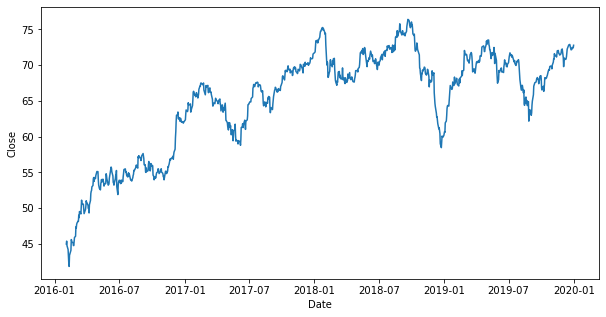

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(datas2)
plt.xlabel('Date')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

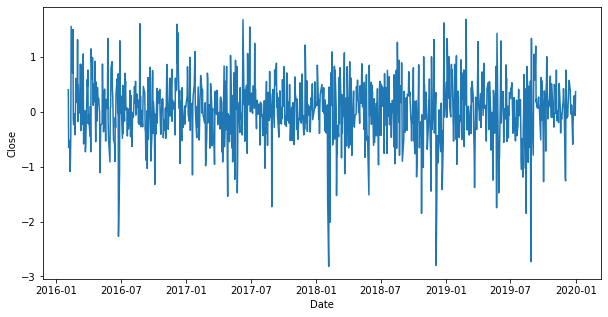

In [41]:
#STEP 1 Difference data to make data stationary on mean (remove trend)
#Plot data as time series
plt.figure(figsize=(10, 5))
plt.plot(datas2.diff(periods=1))
plt.xlabel('Date')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

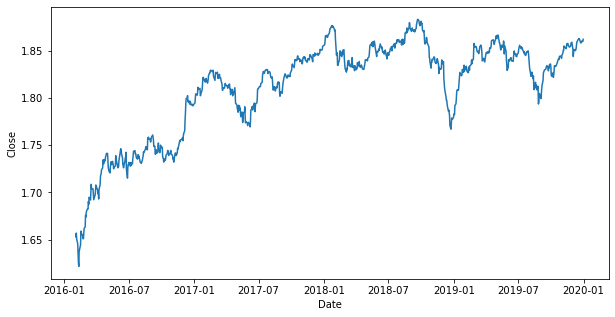

In [42]:
#STEP 2 Difference log transform data to make data stationary on both mean and variance
#log transform data (make data stationary on variance)
plt.figure(figsize=(10, 5))
plt.plot(np.log10(datas2))
plt.xlabel('Date')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

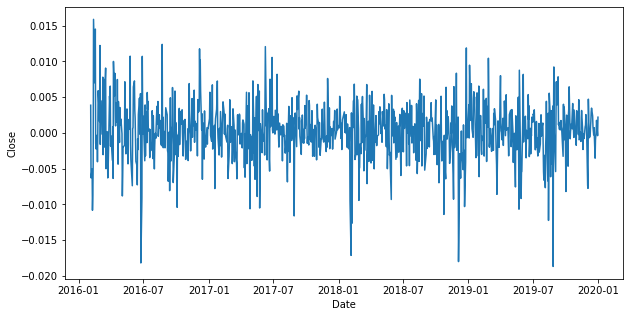

In [43]:
#differenced log transform data 
#To confirm if the series actually stationary on both mean and variance 
plt.figure(figsize=(10, 5))
plt.plot(np.log10(datas2).diff(periods=1))
plt.xlabel('Date')
plt.ylabel('Close')

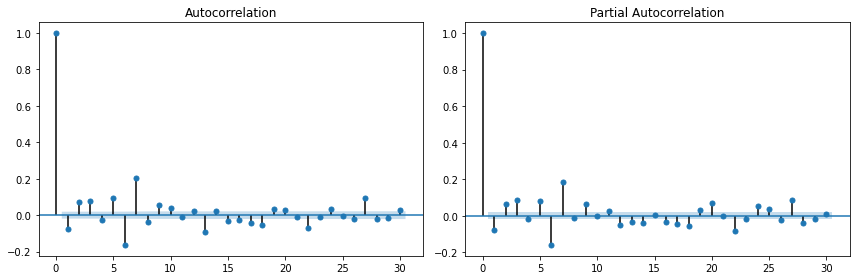

In [44]:
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Step 3
#PLOT ACF(Autocoreelation factor) AND PACF to identify potential AR and MA Model

datas2_log = np.log10(datas)
datas2_log.dropna(inplace=True)

datas2_log_diff = datas2_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
datas2_log_diff.dropna(inplace=True)

fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(datas2_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(datas2_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

#Able to find the seasonal component availabe in the residuals at the lag 7

In [45]:
#Step 4:
#Find ARIMA(p,d,q): Identification of best fit ARIMA model
#Test difference combination of p,d,q
#Find the minimum AIC(Akaike Information Criterion)
# d should be 1, from previous step
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

In [ ]:
# this takes long to run e.g. 1 hour

warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(datas2_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True,
                                                   initialization='approximate_diffuse')
            results = temp_model.fit()

            # print("SARIMAX{}x{} - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{} model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

In [46]:
#Step5 prediction

best_model = sm.tsa.statespace.SARIMAX(datas2_log, order=(0, 1, 0), seasonal_order=(0, 0, 0, 7), enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()
# Get forecast 730 steps (2 years) ahead in future
n_steps = 730
pred_uc_99 = best_results.get_forecast(steps=730, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=730, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

idx = pd.date_range(datas2.index[-1], periods=n_steps, freq='D')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`

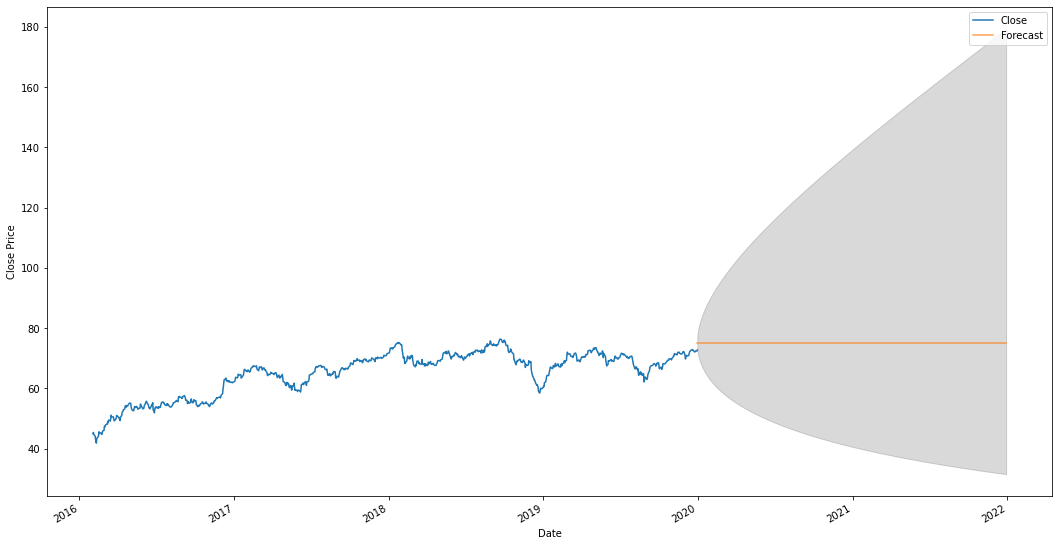

In [47]:
# plot the forecast along with the confidence band
axis = datas2.plot(label='Observed', figsize=(18, 10))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Date')
axis.set_ylabel('Close Price')
plt.legend(loc='best')
plt.show()

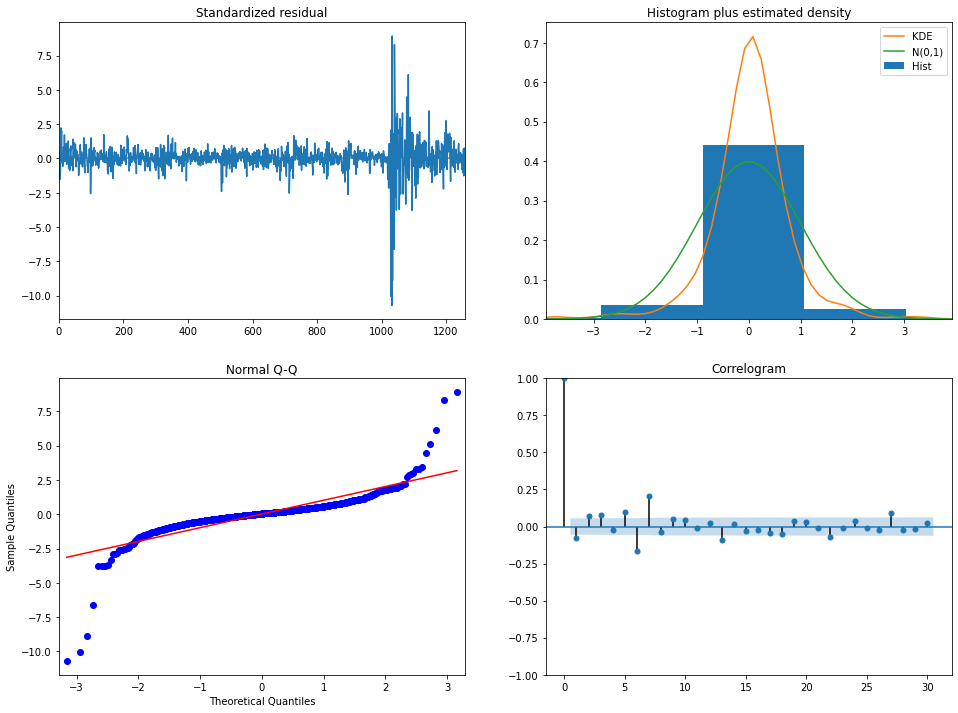

In [48]:
# validate Time series analysis result
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

# try recreate the Prophet graphs

In [49]:
def plot(
    m, fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds', ylabel='y',
    figsize=(10, 6)
):
    if ax is None:
        fig = plt.figure(facecolor='w', figsize=figsize)
        ax = fig.add_subplot(111)
    else:
        fig = ax.get_figure()
    fcst_t = fcst['ds'].dt.to_pydatetime()
    ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.')
    ax.plot(fcst_t, fcst['yhat'], ls='-', c='#0072B2')
    if 'cap' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['cap'], ls='--', c='k')
    if m.logistic_floor and 'floor' in fcst and plot_cap:
        ax.plot(fcst_t, fcst['floor'], ls='--', c='k')
    if uncertainty:
        ax.fill_between(fcst_t, fcst['yhat_lower'], fcst['yhat_upper'],
                        color='#0072B2', alpha=0.2)
    ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    fig.tight_layout()
    return fig

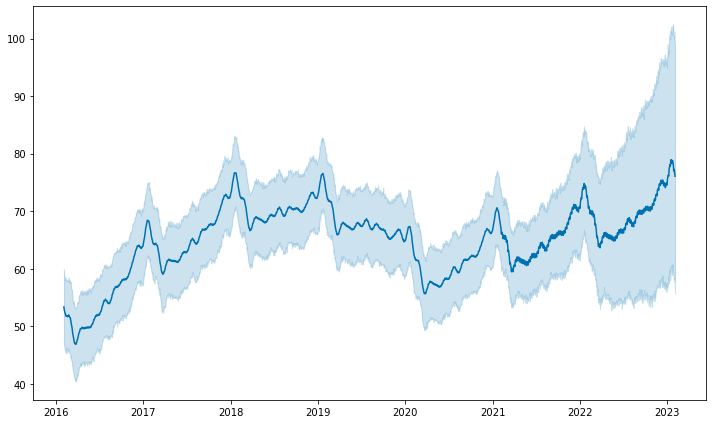

In [50]:
fcst = prediction
fig = plt.figure(facecolor='w', figsize=(10,6))
ax = fig.add_subplot(111)
fcst_t = fcst['ds'].dt.to_pydatetime()

ax.plot(fcst_t, fcst['yhat'], ls='-', c='#0072B2')
ax.fill_between(fcst_t, fcst['yhat_lower'], fcst['yhat_upper'], color='#0072B2', alpha=0.2)
fig.tight_layout()


In [51]:
predict = prediction
predict['ds']=predict['ds'].dt.strftime('%Y-%m-%d')
predict = predict.rename(columns={'ds':'date'})

In [52]:
predict.to_json(r'predict.json',orient='records')